# Initial Setup

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)

In [ ]:
!pip install transformers datasets evaluate concrete-ml

In [ ]:
%cd /content/drive/My Drive/Team 3 Stats 170A/

# Get Data

In [ ]:
df = pd.read_csv("./labeling_data/Neither_For_Labeling.csv")
df.tail()

,title,text,id
1995,OMG. STFU,To yall in the science library... \nLemme tell...,za8rsq
1996,[deleted by user],[removed],smhotk
1997,Anyone else going to Flog Gnaw?,I need a ride to get to and from flog gnaw nex...,9u1d89
1998,dorm smoke alarms,i think i might have been the first person in ...,q0blda
1999,UCI summer session office not answering phone ...,"Hello everyone, I've been trying to call UCI s...",hc8pqw


In [ ]:
df = pd.read_csv("./labeling_data/nonacademichousing.csv")
df[3:30]

,id,title,text,post_id,fortinoj@uci.edu,kangml@uci.edu,kezhang@uci.edu,suyeoj2@uci.edu,wregiste@uci.edu,Majority Vote,Confidence Score,Unnamed: 11
3,4,Any groups playing soccer?,Like in the evenings or anytime in the day rea...,d34pby,Social life,Social life,Social life,Social life,Social life,Social life,1.00,NaN
4,5,UCSC cafeteria meal cost comparison per meal 2...,[deleted],d53uku,Food ;<br> Financial,Food ;<br> Financial,Food,Food,Food ;<br> Financial,Food \n Financial,0.97,NaN
5,6,Student Job at Uci,Hello! I recently got hired to work at Palo Ve...,x7jord,Jobs,Jobs ;<br> Housing,Jobs ;<br> Housing,Jobs ;<br> Financial,Jobs ;<br> Financial,Jobs \n Housing \n Financial,0.93,NaN
6,7,The Atlantic: The Conservative Case Against Ho...,NaN,7z0u4k,Unclassified,Unclassified,Social life,Social life,Housing,Unclassified \n Social life \n Housing,0.92,NaN
7,8,Story of my life,[deleted],darq29,Unclassified,Unclassified,Social life,Social life,Unclassified,Unclassified \n Social life,0.93,NaN
8,9,Out of curiosity how much do parking spots usu...,NaN,124hn62,Transportation ;<br> Financial,Transportation,Transportation,Transportation,Transportation,Transportation \n Financial,0.98,NaN
9,10,"If you're still unsure about your major, check...",[removed],byicd2,Academic,Academic,Academic,Academic,Academic,Academic,1.00,NaN
10,11,Split an Uber tomorrow!,I’m ubering to SJC around 7:30am tomorrow. Mes...,fj7778,Transportation,Transportation,Transportation,Transportation ;<br> Marketplace,Transportation,Transportation \n Marketplace,0.98,NaN
11,12,Anyone here fly rc planes?,Looking for some people to fly with :),dxtx8o,Social life,Transportation,Social life,Transportation ;<br> Marketplace,Social life,Social life \n Transportation \n Marketplace,0.92,NaN
12,13,It just doesn’t make any sense,[deleted],k61puh,Unclassified,Unclassified,Unclassified,Social life,Unclassified,Unclassified \n Social life,0.97,NaN


In [ ]:
labels = {'Unclassified' : 0, 
          'Social life': 1,
          'Academic': 2,
          'Marketplace': 3,
          'Jobs': 4,
          'Health': 5,
          'Admissions': 6,
          'Housing' : 7,
          'Financial' : 8,
          'Missing Items' : 9,
          'Transportation' : 10,
          'Food' : 11
         }

In [ ]:
cols = ['fortinoj@uci.edu', 'kangml@uci.edu',
       'kezhang@uci.edu', 'suyeoj2@uci.edu', 'wregiste@uci.edu']

In [ ]:
def get_labels(vals: str, labels=labels):
  if isinstance(vals, str):
    vals = vals.split(';<br>')
    nums = []
    for val in vals:
        nums.append(labels[val.strip()])
  else:
    nums = 'NaN'
    
  return nums

In [ ]:
num_labels = [[] for x in range(len(df))]
for col in cols:
    labs = df[col].apply(get_labels)
    for i, lab_list in enumerate(labs):
        num_labels[i].extend(lab_list)
def most_frequent(List):
    return max(set(List), key = List.count)
final_labels = pd.Series(num_labels).apply(most_frequent)

In [ ]:
df['single_majority'] = final_labels

0        3
1        1
2        2
3        1
4       11
        ..
1995     N
1996     N
1997     N
1998     N
1999     N
Name: single_majority, Length: 2000, dtype: object


In [ ]:
data = df[['title', 'text', 'single_majority']].copy()
data['text'] = data['title'] + data['text'].fillna('NaN')

In [ ]:
data.head(10)

,title,text,single_majority
0,Hmu with best offer,Hmu with best offerNaN,3
1,Whomst tryna go to tropicalia,Whomst tryna go to tropicalia[deleted],1
2,How do i schedule an appointment with my major...,How do i schedule an appointment with my major...,2
3,Any groups playing soccer?,Any groups playing soccer?Like in the evenings...,1
4,UCSC cafeteria meal cost comparison per meal 2...,UCSC cafeteria meal cost comparison per meal 2...,11
5,Student Job at Uci,Student Job at UciHello! I recently got hired ...,4
6,The Atlantic: The Conservative Case Against Ho...,The Atlantic: The Conservative Case Against Ho...,0
7,Story of my life,Story of my life[deleted],0
8,Out of curiosity how much do parking spots usu...,Out of curiosity how much do parking spots usu...,10
9,"If you're still unsure about your major, check...","If you're still unsure about your major, check...",2


In [ ]:
labels = {'unclassified' : 0, 
          'social life': 1,
          'academic': 2,
          'sports': 3,
          'jobs': 4,
          'health': 5,
          'admissions': 6,
          'housing' : 7,
          'financial' : 8,
          'missing items' : 9,
          'transportation' : 10,
          'food' : 11
         }

In [ ]:
cols = ['warren_label(s)', 'justin_labels',
       'melissa_labels', 'kevin_labels', 'ally_labels']

In [ ]:
def get_labels(vals: str, labels=labels):
    vals = vals.split(',')
    nums = []
    for val in vals:
        nums.append(labels[val.strip()])
    
    return nums

In [ ]:
num_labels = [[] for x in range(len(df))]
for col in cols:
    labs = df[col].apply(get_labels)
    for i, lab_list in enumerate(labs):
        num_labels[i].extend(lab_list)
def most_frequent(List):
    return max(set(List), key = List.count)
final_labels = pd.Series(num_labels).apply(most_frequent)

KeyError: ignored

In [ ]:
df['final_labels'] = final_labels

In [ ]:
data = df[['title', 'selftext', 'final_labels']].copy()
data['text'] = data['title']
data['text'] = data['text'] + data['selftext'].fillna('NaN')

<Axes: >

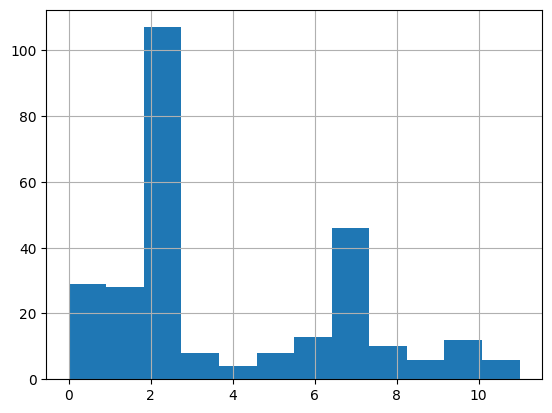

In [ ]:
df.final_labels.hist(bins=12)

# Use Transformer To Get Hidden State

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
# distil-model is a distiled (smaller but similar performance) version of the original model 
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")


In [ ]:
# Load the pre-trained model
transformer_model = AutoModelForSequenceClassification.from_pretrained(
   "distilroberta-base"
)

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.out_proj.bias

In [ ]:
# take text to hidden representation learned by distil-model
import tqdm
def text_to_tensor(
   list_text_X_train: list,
   transformer_model: AutoModelForSequenceClassification,
   tokenizer: AutoTokenizer,
   device: str,
) -> np.ndarray:
   # Tokenize each text in the list one by one
   tokenized_text_X_train_split = [
       tokenizer.encode(text_x_train, return_tensors="pt", truncation=True)
       for text_x_train in list_text_X_train
   ]

   # Send the model to the device
   transformer_model = transformer_model.to(device)
   output_hidden_states_list = [None] * len(tokenized_text_X_train_split)

   for i, tokenized_x in enumerate(tqdm.tqdm(tokenized_text_X_train_split)):
       # Pass the tokens through the transformer model and get the hidden states
       # Only keep the last hidden layer state for now
       output_hidden_states = transformer_model(tokenized_x.to(device), output_hidden_states=True)[1][-1]
       # Average over the tokens axis to get a representation at the text level.
       output_hidden_states = output_hidden_states.mean(dim=1)
       output_hidden_states = output_hidden_states.detach().cpu().numpy()
       output_hidden_states_list[i] = output_hidden_states

   return np.concatenate(output_hidden_states_list, axis=0)

In [ ]:
hidden_states = text_to_tensor(list(data.text), transformer_model, tokenizer, device)

100%|██████████| 2000/2000 [00:25<00:00, 79.97it/s]


In [ ]:
X = hidden_states
y = data['single_majority'].apply(lambda x : 0 if x != 2 else 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Prepare XGB Classifier

In [ ]:
parameters = {
    "max_depth": [1, 2, 3, 4],
    "n_estimators": [10, 30, 50, 70],
    'learning_rate': [0.01, 0.03, 0.1]
}

scoring = ['recall', 'precision', 'accuracy']
# Now we have a representation for each tweet, we can train a model on these.
grid_search = GridSearchCV(XGBClassifier(scale_pos_weight=(277-107/107)), parameters, cv=5, n_jobs=1, scoring=scoring, refit='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.03, 0.1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [10, 30, 50, 70]},
             refit='accuracy', scoring=['recall', 'precision', 'accuracy'])

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 70}

In [ ]:
model = best_model = grid_search.best_estimator_
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.60      0.71        42
           1       0.60      0.89      0.71        28

    accuracy                           0.71        70
   macro avg       0.74      0.74      0.71        70
weighted avg       0.77      0.71      0.71        70



In [ ]:
plot_roc_curve(model, X_test, y_test)
plt.show()

NameError: ignored

# Try LGBM Classifier

In [ ]:
parameters = {
    "max_depth": [2, 3, 4],
    "num_leaves":[20, 30, 40],
    "n_iter": [80, 100],
    'learning_rate': [0.1, 0.01],
    'verbose': [-1]
}
scoring = ['recall', 'precision', 'accuracy']
# Now we have a representation for each tweet, we can train a model on these.
grid_search = GridSearchCV(LGBMClassifier(verbose=-1), parameters, cv=5, n_jobs=1, scoring=scoring, refit='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
model = best_model = grid_search.best_estimator_
preds = model.predict(X_test)
print(classification_report(y_test, preds))

In [ ]:
plot_roc_curve(model, X_test, y_test)

# Train Best Model on Top 5 Categories

In [ ]:
inv_labels = {v: k for k, v in labels.items()}
models = []
for num in [0, 1, 2, 7, 8]:
    example_count = len(data.query("final_labels == {0}".format(num)))
    print('Percentage of Examples: {0} of class {1}'.format(example_count, inv_labels[num]))

    # get ratio of negative to positive examples
    scale_pos_weight = (277 - example_count) / example_count
    y = data['final_labels'].apply(lambda x : 0 if x != num else 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)  
    model = LGBMClassifier(learning_rate=0.1, max_depth=3, n_iter=80, num_leaves=20, scale_pos_weight=scale_pos_weight)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    models.append(model)

In [ ]:
models[2].booster_.save_model('./notebooks/lightgbm_academic_detector.txt')

In [ ]:
models[3].booster_.save_model('./notebooks/lightgbm_housing_detector.txt')